# Load and explore the data set

In [1]:
# Load dataset
import pandas as pd
data = pd.read_csv('datasets/cars/used_car_dataset.csv')
data

price    year manufacturer  condition    cylinders fuel  odometer  \
0     18219.0  2008.0         ford  excellent  8 cylinders  gas   86238.0   
1       800.0  2008.0         ford  excellent  6 cylinders  gas  170953.0   
2     23660.0  2016.0         ford       good  8 cylinders  gas  119026.0   
3      5335.0  2009.0         ford  excellent  4 cylinders  gas   69000.0   
4      1597.0  1999.0         ford       good  6 cylinders  gas   59130.0   
...       ...     ...          ...        ...          ...  ...       ...   
9992  18924.0  2017.0         ford       good  4 cylinders  gas  122612.0   
9993   4248.0  2002.0         ford   like new  6 cylinders  gas       NaN   
9994  26269.0  2017.0         ford  excellent  6 cylinders  gas   52541.0   
9995   6149.0  2013.0         ford       good  4 cylinders  gas  197000.0   
9996   9831.0  2015.0         ford  excellent  4 cylinders  gas  139000.0   

     transmission    type paint_color    F1        F2        F3 F4  
0       automatic  pickup       black  5823  2.193844 -0.031986  b  
1       automatic     SUV         red  2024  2.133691  0.097985  b  
2       automatic   truck       white   294  2.160859  0.046984  c  
3          manual   sedan        blue  3544  2.114929 -0.110121  c  
4       automatic   sedan        blue  1329  1.829625 -0.060615  c  
...           ...     ...         ...   ...       ...       ... ..  
9992    automatic   sedan      silver  3588  2.202934  0.212334  b  
9993    automatic   sedan      silver   157  2.147843  0.070923  a  
9994    automatic     SUV       white  1499  2.392569  0.094751  c  
9995    automatic     SUV       black   180  2.269796  0.129762  a  
9996    automatic     SUV       white   386  2.407066  0.311618  c  

[9997 rows x 14 columns]

In [2]:
# Describe dataset
data.describe()

price         year      odometer            F1           F2  \
count    9997.000000  9997.000000  9.331000e+03   9997.000000  9997.000000   
mean    14262.349305  2009.814144  1.120436e+05   1523.945584     2.225496   
std     12520.818169     8.862341  8.055942e+04   2090.438720     0.227250   
min         0.000000  1922.000000  0.000000e+00      4.000000     0.167352   
25%      5643.000000  2007.000000  6.653300e+04    311.000000     2.133806   
50%     10463.000000  2012.000000  1.100000e+05    717.000000     2.255670   
75%     19464.000000  2015.000000  1.500000e+05   1966.000000     2.362382   
max    402498.000000  2021.000000  2.074484e+06  36773.000000     2.742570   

                F3  
count  9997.000000  
mean      0.099283  
std       0.100833  
min      -0.313948  
25%       0.029968  
50%       0.099648  
75%       0.167504  
max       0.473412

In [3]:
# Check variable type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [4]:
# Count values of each object and sort them from small to big

cat_cols = data.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))    

counts
column       value              
F4           c              3246
             a              3313
             b              3438
condition    fair            370
             like new       1181
             good           3567
             excellent      4879
cylinders    4 cylinders    3127
             8 cylinders    3233
             6 cylinders    3637
fuel         gas            9997
manufacturer subaru          989
             ford           9008
paint_color  blue           1372
             red            1580
             silver         1604
             black          2052
             white          3389
transmission manual          557
             automatic      9440
type         pickup         1737
             truck          2569
             sedan          2626
             SUV            3065

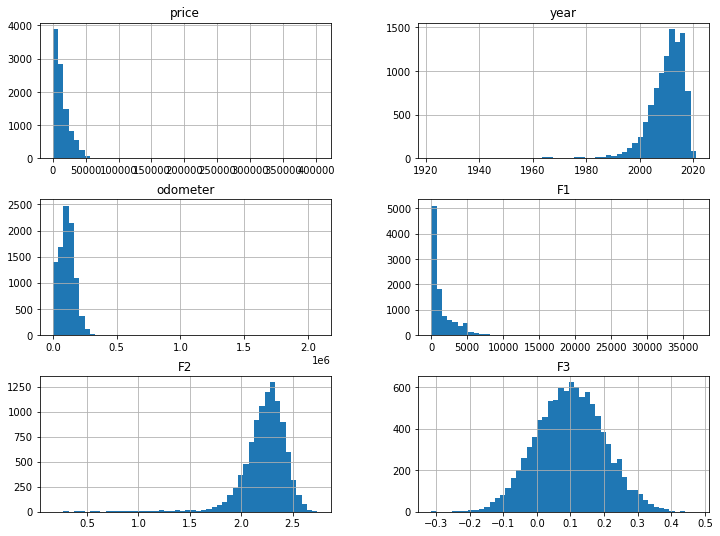

In [5]:
# Plot histograms
data.hist(bins=50, figsize=(12,9));

# Training, Validation and Test Set

In [6]:
# Create randam indices
import numpy as np
np.random.seed(44)
N = len(data)
shuffled_indices = np.random.permutation(N)

# Split indices into train, validation and test sets
train_indices = shuffled_indices[:int(N*0.6)]
valid_indices = shuffled_indices[int(N*0.6):int(N*0.8)]
test_indices = shuffled_indices[int(N*0.8):]

# Split data into train, validation and test sets
train_set = data.iloc[train_indices]
valid_set = data.iloc[valid_indices]
test_set = data.iloc[test_indices]

train_set.shape, valid_set.shape, test_set.shape

((5998, 14), (1999, 14), (2000, 14))

# Preprocessing

In [10]:
import sklearn.preprocessing

def transform(input_data, dependent_variable_name):
    """Define the full preprocessing pipeline"""
    # Drop NA
    transformed = input_data.dropna()
    
    # Select the dependent variable
    dependent = transformed[dependent_variable_name].copy()
    
    # Select the independent variables
    independent = transformed.drop(dependent_variable_name, axis=1)
    stored_independent = independent
    
    # Drop categorical columns in independent
    independent = independent.drop(cat_cols, axis = 1)
    
    # Encode the cathegorical variable as one hot vectors and replace them by the one hot vectors
    def onehotencoder(c_name, independent, stored_independent):
        """c_name is short for categorical data name"""
        independent = independent
        stored_independent = stored_independent
        
        # Encode the categorical variable as one hot vectors
        onehot_encoder = sklearn.preprocessing.OneHotEncoder()
        one_hot = onehot_encoder.fit_transform(stored_independent[[c_name]]).toarray()
    
        # Replace the categorical variable by the one hot vector
    
        width = one_hot.shape[-1]
        onehot_names = [f'{c_name}{i}' for i in range(width)]
        independent[onehot_names] = one_hot
        
        return independent
    
    for ele in cat_cols:
        independent = onehotencoder(ele, independent, stored_independent)
    
    return independent, dependent

In [28]:
# Transform the train data
train_x, train_y = transform(train_set, dependent_variable_name='price')
train_x

year  odometer    F1        F2        F3  manufacturer0  \
3472  2018.0   91000.0   564  2.187494  0.109292            1.0   
3845  2008.0  158000.0    87  2.212060  0.009102            1.0   
4378  2009.0  129000.0   148  2.256992  0.054347            0.0   
5785  2017.0   42104.0  1716  2.341704  0.182984            1.0   
5551  1995.0   68500.0   727  1.876679  0.221975            1.0   
...      ...       ...   ...       ...       ...            ...   
7633  2013.0  129000.0   530  2.219729  0.049774            1.0   
7101  2015.0   63514.0   584  2.292217  0.167719            1.0   
1940  2006.0  185000.0  1119  2.200375  0.155927            1.0   
9894  2017.0   95483.0  3003  2.496918  0.323592            1.0   
662   2010.0  117702.0  3490  2.134084  0.184980            1.0   

      manufacturer1  condition0  condition1  condition2  ...  type2  type3  \
3472            0.0         0.0         0.0         0.0  ...    0.0    1.0   
3845            0.0         0.0         0.0         1.0  ...    1.0    0.0   
4378            1.0         1.0         0.0         0.0  ...    0.0    0.0   
5785            0.0         1.0         0.0         0.0  ...    0.0    0.0   
5551            0.0         0.0         0.0         1.0  ...    0.0    1.0   
...             ...         ...         ...         ...  ...    ...    ...   
7633            0.0         0.0         0.0         0.0  ...    1.0    0.0   
7101            0.0         1.0         0.0         0.0  ...    0.0    1.0   
1940            0.0         1.0         0.0         0.0  ...    0.0    1.0   
9894            0.0         1.0         0.0         0.0  ...    1.0    0.0   
662             0.0         1.0         0.0         0.0  ...    0.0    1.0   

      paint_color0  paint_color1  paint_color2  paint_color3  paint_color4  \
3472           0.0           0.0           0.0           1.0           0.0   
3845           0.0           1.0           0.0           0.0           0.0   
4378           0.0           1.0           0.0           0.0           0.0   
5785           0.0           1.0           0.0           0.0           0.0   
5551           1.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
7633           0.0           1.0           0.0           0.0           0.0   
7101           0.0           0.0           1.0           0.0           0.0   
1940           1.0           0.0           0.0           0.0           0.0   
9894           0.0           0.0           1.0           0.0           0.0   
662            1.0           0.0           0.0           0.0           0.0   

      F40  F41  F42  
3472  0.0  0.0  1.0  
3845  1.0  0.0  0.0  
4378  0.0  0.0  1.0  
5785  0.0  0.0  1.0  
5551  0.0  1.0  0.0  
...   ...  ...  ...  
7633  0.0  0.0  1.0  
7101  0.0  0.0  1.0  
1940  1.0  0.0  0.0  
9894  0.0  0.0  1.0  
662   1.0  0.0  0.0  

[5603 rows x 29 columns]

In [12]:
# Transform the validation data
valid_x, valid_y = transform(valid_set, dependent_variable_name='price')

In [13]:
# Transform the test data
test_x, test_y = transform(test_set, dependent_variable_name='price')

# Train

In [14]:
import sklearn.linear_model

# Define and fit a linear regression model
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression()

In [17]:
import sklearn.metrics

# Check the L2 distance
np.sqrt(sklearn.metrics.mean_squared_error(lin_reg.predict(train_x), train_y))

10285.994684236854

In [18]:
np.sqrt(sklearn.metrics.mean_squared_error(lin_reg.predict(valid_x), valid_y))

9134.301770855856

# Tune

In [19]:
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(train_x, train_y)

# Check the performance
np.sqrt(sklearn.metrics.mean_squared_error(reg1.predict(valid_x), valid_y))

9134.301770855856

In [20]:
reg2 = sklearn.linear_model.Ridge(alpha=100)
reg2.fit(train_x, train_y)

# Check the performance
np.sqrt(sklearn.metrics.mean_squared_error(reg2.predict(valid_x), valid_y))

9175.535967926635

In [21]:
reg3 = sklearn.linear_model.Lasso(alpha=100)
reg3.fit(train_x, train_y)

# Check the performance
np.sqrt(sklearn.metrics.mean_squared_error(reg3.predict(valid_x), valid_y))

9278.095793392735

# Train for Real

In [22]:
train_an_valid_x = train_x.append(valid_x)
train_an_valid_y = train_y.append(valid_y)

train_an_valid_x.shape, train_an_valid_y.shape

((7457, 29), (7457,))

In [23]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(train_an_valid_x, train_an_valid_x)

# Check the performance
display(np.sqrt(sklearn.metrics.mean_squared_error(reg.predict(valid_x), valid_y)))
np.sqrt(sklearn.metrics.mean_squared_error(reg.predict(valid_x), valid_y))

9134.301770855856

9134.301770855856

# Test

In [24]:
# Check the performance
np.sqrt(sklearn.metrics.mean_squared_error(reg.predict(test_x), test_y))

8944.450251217097

# Correlations

In [25]:
# Check correlations between variables 
def another_transform(input_data):
    """Define the full preprocessing pipeline"""
    # Drop NA
    transformed = input_data.dropna()
        
    stored_transformed = transformed
    
    # Drop categorical columns in independent
    transformed = transformed.drop(cat_cols, axis = 1)
    
    # Encode the cathegorical variable as one hot vectors and replace them by the one hot vectors
    def onehotencoder(c_name, transformed, stored_transformed):
        """c_name is short for categorical data name"""
        transformed = transformed
        stored_transformed = stored_transformed
        
        # Encode the categorical variable as one hot vectors
        onehot_encoder = sklearn.preprocessing.OneHotEncoder()
        one_hot = onehot_encoder.fit_transform(stored_transformed[[c_name]]).toarray()
    
        # Replace the categorical variable by the one hot vector
    
        width = one_hot.shape[-1]
        onehot_names = [f'{c_name}{i}' for i in range(width)]
        transformed[onehot_names] = one_hot
        
        return transformed
    
    for ele in cat_cols:
        transformed = onehotencoder(ele, transformed, stored_transformed)
    
    return transformed

train = another_transform(train_set)

# Check variables that are correlated with price
train.corr()["price"].sort_values(ascending=False)

price            1.000000
year             0.364530
F2               0.322718
type1            0.209371
F1               0.193745
type3            0.192536
condition3       0.153273
cylinders2       0.119688
F3               0.082253
cylinders1       0.060322
transmission0    0.054674
condition0       0.045183
paint_color0     0.039203
paint_color4     0.035891
manufacturer0    0.034546
paint_color2     0.010965
F41              0.009024
F42             -0.004072
F40             -0.004951
manufacturer1   -0.034546
paint_color1    -0.036265
transmission1   -0.054674
paint_color3    -0.066859
condition2      -0.088877
type0           -0.101381
condition1      -0.159346
cylinders0      -0.182630
type2           -0.262504
odometer        -0.377748
fuel0                 NaN
Name: price, dtype: float64

In [29]:
train_an_valid_x.columns

Index(['year', 'odometer', 'F1', 'F2', 'F3', 'manufacturer0', 'manufacturer1',
       'condition0', 'condition1', 'condition2', 'condition3', 'cylinders0',
       'cylinders1', 'cylinders2', 'fuel0', 'transmission0', 'transmission1',
       'type0', 'type1', 'type2', 'type3', 'paint_color0', 'paint_color1',
       'paint_color2', 'paint_color3', 'paint_color4', 'F40', 'F41', 'F42'],
      dtype='object')

In [27]:
# compute how each indepentent variable affect dependent variable
reg.coef_

array([ 4.92764381e+02, -4.46867259e-02,  4.01237949e-01,  8.90222987e+02,
        1.08082715e+04, -1.47724846e+03,  1.47724846e+03,  7.96280945e+02,
       -3.63699105e+03, -4.92338970e+02,  3.33304907e+03, -2.76030291e+03,
        9.48289596e+02,  1.81201332e+03,  3.63797881e-12, -1.72495270e+03,
        1.72495270e+03, -2.82029706e+03,  4.81156134e+03, -5.64058595e+03,
        3.64932166e+03,  1.49806880e+03, -4.00172803e+02,  3.93738703e+02,
       -5.77902576e+02, -9.13732124e+02, -7.94512422e+01,  4.82223905e+00,
        7.46290031e+01])